In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from google.cloud import bigquery

#### Retrieving Dataset

In [2]:
client = bigquery.Client()

dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')

dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


#### Viewing Tables

In [3]:
tables = list(client.list_tables(dataset))

list_of_tables = [table.table_id for table in tables]

print(list_of_tables)

['ga_sessions_20160801', 'ga_sessions_20160802', 'ga_sessions_20160803', 'ga_sessions_20160804', 'ga_sessions_20160805', 'ga_sessions_20160806', 'ga_sessions_20160807', 'ga_sessions_20160808', 'ga_sessions_20160809', 'ga_sessions_20160810', 'ga_sessions_20160811', 'ga_sessions_20160812', 'ga_sessions_20160813', 'ga_sessions_20160814', 'ga_sessions_20160815', 'ga_sessions_20160816', 'ga_sessions_20160817', 'ga_sessions_20160818', 'ga_sessions_20160819', 'ga_sessions_20160820', 'ga_sessions_20160821', 'ga_sessions_20160822', 'ga_sessions_20160823', 'ga_sessions_20160824', 'ga_sessions_20160825', 'ga_sessions_20160826', 'ga_sessions_20160827', 'ga_sessions_20160828', 'ga_sessions_20160829', 'ga_sessions_20160830', 'ga_sessions_20160831', 'ga_sessions_20160901', 'ga_sessions_20160902', 'ga_sessions_20160903', 'ga_sessions_20160904', 'ga_sessions_20160905', 'ga_sessions_20160906', 'ga_sessions_20160907', 'ga_sessions_20160908', 'ga_sessions_20160909', 'ga_sessions_20160910', 'ga_sessions_20

#### Viewing columns inside the last table

In [4]:
last_table_ref = dataset_ref.table('ga_sessions_20170801')

last_table = client.get_table(last_table_ref)

client.list_rows(last_table, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,None,1,1501583974,1501583974,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Car...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2248281639583218707,None,None,Organic Search,Not Socially Engaged
1,None,1,1501616585,1501616585,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8647436381089107732,None,None,Organic Search,Not Socially Engaged
2,None,1,1501583344,1501583344,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2055839700856389632,None,None,Organic Search,Not Socially Engaged
3,None,1,1501573386,1501573386,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut...",0750846065342433129,None,None,Direct,Not Socially Engaged
4,None,8,1501651467,1501651467,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu...",0573427169410921198,None,None,Organic Search,Not Socially Engaged


#### First Query: Finding total hits for 2017-08-01

In [5]:
q1 = '''
     SELECT date, COUNT(hits) AS hits
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
     GROUP BY date
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q1_job = client.query(q1, job_config=safe_config)

q1_results = q1_job.to_dataframe()

print(q1_results)

       date  hits
0  20170801  2556


#### Second Query: Visits per Continent

In [6]:
q2 = '''
     SELECT geoNetwork AS place
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q2_job = client.query(q2, job_config=safe_config)

q2_results = q2_job.to_dataframe()

continent_lst = []
for x in q2_results['place']:
    x = x['continent']
    continent_lst.append(x)
q2_results['continents'] = continent_lst

continent_count = {'Americas': 0, 'Asia': 0, 'Europe': 0, 'Oceania': 0, 'Africa': 0}
for continent in q2_results['continents']:
    if continent == 'Americas':
        continent_count['Americas'] += 1
    if continent == 'Asia':
        continent_count['Asia'] += 1
    if continent == 'Europe':
        continent_count['Europe'] += 1
    if continent == 'Oceania':
        continent_count['Oceania'] += 1
    if continent == 'Africa':
        continent_count['Africa'] += 1
    

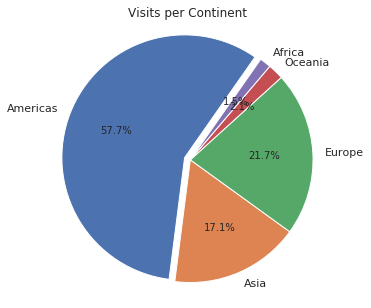

In [7]:
labels = continent_count.keys()
data = continent_count.values()
explode = (0.05, 0, 0,0,0)

plt.figure(figsize=(5,5))
plt.pie(data, labels=labels, explode=explode, autopct='%1.1f%%', startangle=55)
plt.title('Visits per Continent')
plt.axis('equal') 

plt.show()

#### Third Query: 2-day channel comparison 

In [8]:
q3 = '''
     SELECT date, a.channelGrouping AS channel, COUNT(a.channelGrouping) AS total
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801` AS a
     GROUP BY date, a.channelGrouping
     UNION ALL
     SELECT date, b.channelGrouping AS channel, COUNT(b.channelGrouping) AS total
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170731` AS b
     GROUP BY date, b.channelGrouping
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q3_job = client.query(q3, job_config=safe_config)

q3_results = q3_job.to_dataframe()

print(q3_results)

        date         channel  total
0   20170731  Organic Search   1389
1   20170731          Direct    441
2   20170731        Referral    418
3   20170731         Display     43
4   20170731     Paid Search     72
5   20170731      Affiliates     42
6   20170731          Social    215
7   20170801  Organic Search   1346
8   20170801          Direct    400
9   20170801        Referral    436
10  20170801     Paid Search     70
11  20170801         Display     39
12  20170801      Affiliates     52
13  20170801          Social    213


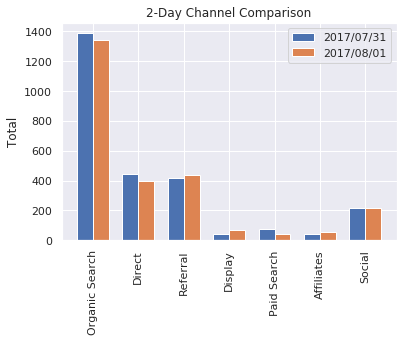

In [9]:
day1_lst = []
for x in q3_results['total'][0:7]:
    day1_lst.append(x)
    
day2_lst = []
for x in q3_results['total'][7:14]:
    day2_lst.append(x)    
    
N = 7
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()

day1_bars = ax.bar(ind, day1_lst, width)
day2_bars = ax.bar(ind + width, day2_lst, width)

ax.set_ylabel('Total')
ax.set_title('2-Day Channel Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Organic Search', 'Direct', 'Referral', 'Display', 'Paid Search', 'Affiliates', 'Social'), rotation='vertical')

ax.legend((day1_bars[0], day2_bars[0]), ('2017/07/31', '2017/08/01'))

plt.show()

#### Fourth Query: Finding repeat visitors for one day

In [10]:
q4 = '''
     SELECT fullVisitorId,
         COUNT(visitNumber)OVER(
                                PARTITION BY visitId
                                ORDER BY visitNumber DESC
                                ROWS BETWEEN 1 PRECEDING AND CURRENT ROW
                               )as repeat_visitor
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
     WHERE visitNumber >= 2
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q4_job = client.query(q4, job_config=safe_config)

q4_results = q4_job.to_dataframe()

print(q4_results)

           fullVisitorId  repeat_visitor
0     581456539078455132               1
1     903671600075470143               1
2    8555003181225615424               1
3    8497228714350538778               1
4     296822863046398447               1
..                   ...             ...
679  8762707685667359248               1
680  7825082949972548337               1
681  2182591763226364361               1
682  3884810646891698298               1
683  3800266955937177725               1

[684 rows x 2 columns]


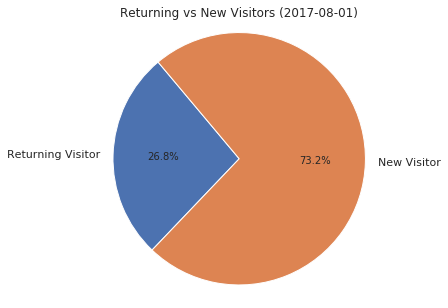

In [11]:
returning_visitors = 684
new_visitors = 2556 - returning_visitors

labels = ['Returning Visitor', 'New Visitor']
data = [returning_visitors, new_visitors]

plt.figure(figsize=(5,5))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=130)
plt.title('Returning vs New Visitors (2017-08-01)')
plt.axis('equal') 

plt.show()

#### Fifth Query: Finding traffic sources with count larger than 10

In [12]:
print(last_table.schema[6])

SchemaField('trafficSource', 'RECORD', 'NULLABLE', None, (SchemaField('referralPath', 'STRING', 'NULLABLE', None, ()), SchemaField('campaign', 'STRING', 'NULLABLE', None, ()), SchemaField('source', 'STRING', 'NULLABLE', None, ()), SchemaField('medium', 'STRING', 'NULLABLE', None, ()), SchemaField('keyword', 'STRING', 'NULLABLE', None, ()), SchemaField('adContent', 'STRING', 'NULLABLE', None, ()), SchemaField('adwordsClickInfo', 'RECORD', 'NULLABLE', None, (SchemaField('campaignId', 'INTEGER', 'NULLABLE', None, ()), SchemaField('adGroupId', 'INTEGER', 'NULLABLE', None, ()), SchemaField('creativeId', 'INTEGER', 'NULLABLE', None, ()), SchemaField('criteriaId', 'INTEGER', 'NULLABLE', None, ()), SchemaField('page', 'INTEGER', 'NULLABLE', None, ()), SchemaField('slot', 'STRING', 'NULLABLE', None, ()), SchemaField('criteriaParameters', 'STRING', 'NULLABLE', None, ()), SchemaField('gclId', 'STRING', 'NULLABLE', None, ()), SchemaField('customerId', 'INTEGER', 'NULLABLE', None, ()), SchemaField(

In [13]:
q5 = '''
     SELECT trafficSource.source AS source, COUNT(trafficSource) as counts
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
     GROUP BY source
     HAVING counts >= 10
     ORDER BY counts DESC
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q5_job = client.query(q5, job_config=safe_config)

q5_results = q5_job.to_dataframe()

print(q5_results)

                 source  counts
0              (direct)    2166
1           youtube.com     180
2  analytics.google.com      57
3              Partners      52
4                   dfa      15
5            google.com      12


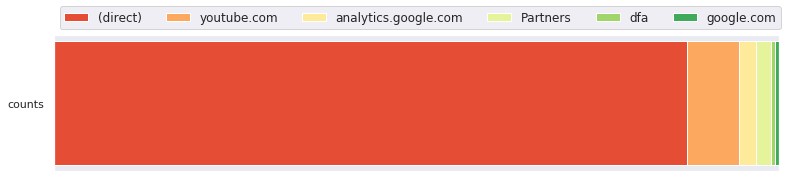

In [14]:
category_names = q5_results['source']
results = {
    'counts': q5_results['counts']
          }


def survey(results, category_names):
   
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(13, 2.5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(results, category_names)
plt.show()

In [15]:
print(category_names)

0                (direct)
1             youtube.com
2    analytics.google.com
3                Partners
4                     dfa
5              google.com
Name: source, dtype: object


#### Sixth Query: Finding total visits per hour of day

In [16]:
print(last_table.schema[5])

SchemaField('totals', 'RECORD', 'NULLABLE', None, (SchemaField('visits', 'INTEGER', 'NULLABLE', None, ()), SchemaField('hits', 'INTEGER', 'NULLABLE', None, ()), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, ()), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, ()), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, ()), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, ()), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, ()), SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, ()), SchemaField('screenviews', 'INTEGER', 'NULLABLE', None, ()), SchemaField('uniqueScreenviews', 'INTEGER', 'NULLABLE', None, ()), SchemaField('timeOnScreen', 'INTEGER', 'NULLABLE', None, ()), SchemaField('totalTransactionRevenue', 'INTEGER', 'NULLABLE', None, ()), SchemaField('sessionQualityDim', 'INTEGER', 'NULLABLE', None, ())))


In [17]:
print(last_table.schema[10])

SchemaField('hits', 'RECORD', 'REPEATED', None, (SchemaField('hitNumber', 'INTEGER', 'NULLABLE', None, ()), SchemaField('time', 'INTEGER', 'NULLABLE', None, ()), SchemaField('hour', 'INTEGER', 'NULLABLE', None, ()), SchemaField('minute', 'INTEGER', 'NULLABLE', None, ()), SchemaField('isSecure', 'BOOLEAN', 'NULLABLE', None, ()), SchemaField('isInteraction', 'BOOLEAN', 'NULLABLE', None, ()), SchemaField('isEntrance', 'BOOLEAN', 'NULLABLE', None, ()), SchemaField('isExit', 'BOOLEAN', 'NULLABLE', None, ()), SchemaField('referer', 'STRING', 'NULLABLE', None, ()), SchemaField('page', 'RECORD', 'NULLABLE', None, (SchemaField('pagePath', 'STRING', 'NULLABLE', None, ()), SchemaField('hostname', 'STRING', 'NULLABLE', None, ()), SchemaField('pageTitle', 'STRING', 'NULLABLE', None, ()), SchemaField('searchKeyword', 'STRING', 'NULLABLE', None, ()), SchemaField('searchCategory', 'STRING', 'NULLABLE', None, ()), SchemaField('pagePathLevel1', 'STRING', 'NULLABLE', None, ()), SchemaField('pagePathLevel

In [18]:
q6 = '''
     SELECT hits.hour AS hour, SUM(totals.visits) AS visits
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, UNNEST(hits) AS hits
     GROUP BY hour
     ORDER BY hour
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q6_job = client.query(q6, job_config=safe_config)

q6_results = q6_job.to_dataframe()

print(q6_results)

    hour  visits
0      0     391
1      1     229
2      2     187
3      3     174
4      4     176
5      5     341
6      6     397
7      7     588
8      8     807
9      9     751
10    10     926
11    11     745
12    12     822
13    13     778
14    14    1129
15    15     840
16    16     596
17    17     428
18    18     556
19    19     499
20    20     451
21    21     580
22    22     503
23    23     339


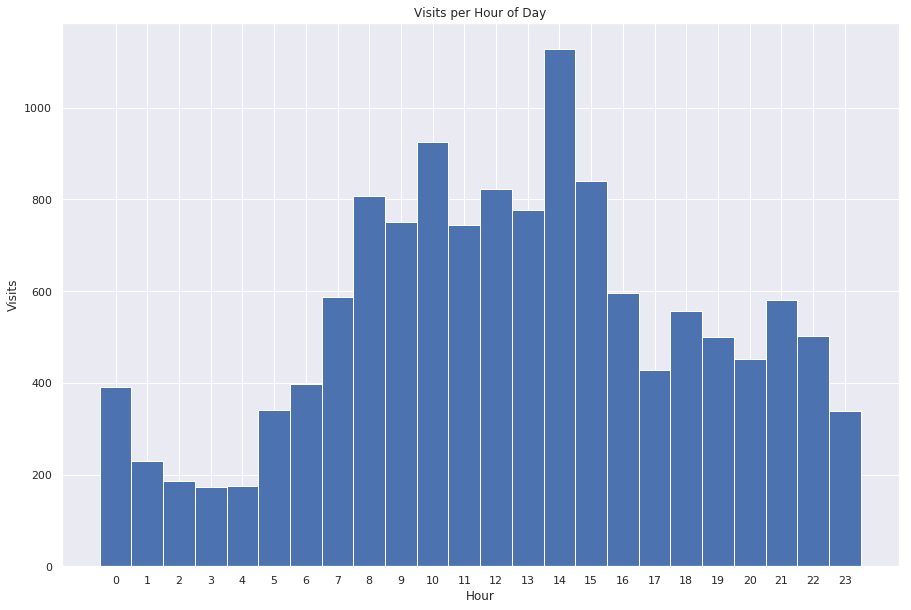

In [19]:
x = q6_results['hour']
y = q6_results['visits']

plt.figure(figsize=(15,10))
plt.bar(x, y, width=1)
plt.title('Visits per Hour of Day')
plt.xlabel('Hour')
plt.xticks(q6_results.index, q6_results['hour'])
plt.ylabel('Visits')


plt.show()

#### Seventh Query: Monthly device visits

In [20]:
from time import time

def show_amount_of_data_scanned(query):
    dry_run_config = bigquery.QueryJobConfig(dry_run=True)
    query_job = client.query(query, job_config=dry_run_config)
    print('Data processed: {} GB'.format(round(query_job.total_bytes_processed / 10**9, 3)))
    
def show_time_to_run(query):
    time_config = bigquery.QueryJobConfig(use_query_cache=False)
    start = time()
    query_result = client.query(query, job_config=time_config).result()
    end = time()
    print('Time to run: {} seconds'.format(round(end-start, 3)))

In [21]:
print(last_table.schema[7])

SchemaField('device', 'RECORD', 'NULLABLE', None, (SchemaField('browser', 'STRING', 'NULLABLE', None, ()), SchemaField('browserVersion', 'STRING', 'NULLABLE', None, ()), SchemaField('browserSize', 'STRING', 'NULLABLE', None, ()), SchemaField('operatingSystem', 'STRING', 'NULLABLE', None, ()), SchemaField('operatingSystemVersion', 'STRING', 'NULLABLE', None, ()), SchemaField('isMobile', 'BOOLEAN', 'NULLABLE', None, ()), SchemaField('mobileDeviceBranding', 'STRING', 'NULLABLE', None, ()), SchemaField('mobileDeviceModel', 'STRING', 'NULLABLE', None, ()), SchemaField('mobileInputSelector', 'STRING', 'NULLABLE', None, ()), SchemaField('mobileDeviceInfo', 'STRING', 'NULLABLE', None, ()), SchemaField('mobileDeviceMarketingName', 'STRING', 'NULLABLE', None, ()), SchemaField('flashVersion', 'STRING', 'NULLABLE', None, ()), SchemaField('javaEnabled', 'BOOLEAN', 'NULLABLE', None, ()), SchemaField('language', 'STRING', 'NULLABLE', None, ()), SchemaField('screenColors', 'STRING', 'NULLABLE', None, 

In [22]:
q7 = '''
     SELECT date, august.device.deviceCategory AS device, SUM(august.totals.visits) AS visits
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801` AS august
     GROUP BY date, device
     UNION ALL
     SELECT date, july.device.deviceCategory as device, SUM(july.totals.visits) as visits
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170701` as july
     GROUP BY date, device
     UNION ALL
     SELECT date, june.device.deviceCategory as device, SUM(june.totals.visits) as visits
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170601` as june
     GROUP BY date, device
     UNION ALL
     SELECT date, may.device.deviceCategory as device, SUM(may.totals.visits) as visits
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170501` as may
     GROUP BY date, device
     UNION ALL
     SELECT date, april.device.deviceCategory as device, SUM(april.totals.visits) as visits
     FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170401` as april
     GROUP BY date, device
     ORDER BY date, device
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q7_job = client.query(q7, job_config=safe_config)

q7_results = q7_job.to_dataframe()

print(q7_results)

show_amount_of_data_scanned(q7)
show_time_to_run(q7)

        date   device  visits
0   20170401  desktop    1420
1   20170401   mobile     646
2   20170401   tablet     104
3   20170501  desktop    1706
4   20170501   mobile     770
5   20170501   tablet     112
6   20170601  desktop    1972
7   20170601   mobile     758
8   20170601   tablet      96
9   20170701  desktop     869
10  20170701   mobile    1036
11  20170701   tablet     143
12  20170801  desktop    1742
13  20170801   mobile     725
14  20170801   tablet      89
Data processed: 0.0 GB
Time to run: 2.809 seconds


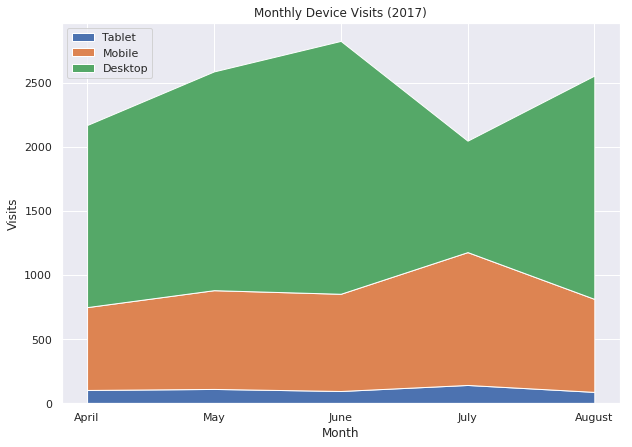

In [23]:
desktop = q7_results['visits'][0::3]
mobile = q7_results['visits'][1::3]
tablet = q7_results['visits'][2::3]
x = ['April', 'May', 'June', 'July', 'August']

y = np.vstack([tablet, mobile, desktop])

labels = ['Tablet', 'Mobile', 'Desktop']

plt.figure(figsize=(10,7))
plt.stackplot(x, tablet, mobile, desktop, labels=labels)
plt.title('Monthly Device Visits (2017)')
plt.ylabel('Visits')
plt.xlabel('Month')
plt.legend(loc='upper left')
plt.show()
